# Battle of Neighborhood
## Week 4 assignment
1. In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.  
<p> 
    

In [8]:
import pandas as pd
! pip install quandl
import quandl

import requests # library to handle requests
#from lxml import html

! pip install requests_html
from requests_html import HTMLSession

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt


     |████████████████████████████████| 133kB 8.8MB/s eta 0:00:01
ERROR: requests 2.21.0 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.9 which is incompatible.
ERROR: ibm-cos-sdk-core 2.4.3 has requirement urllib3<1.25,>=1.20, but you'll have urllib3 1.25.9 which is incompatible.
ERROR: botocore 1.12.82 has requirement urllib3<1.25,>=1.20, but you'll have urllib3 1.25.9 which is incompatible.
  Found existing installation: urllib3 1.24.1
    Uninstalling urllib3-1.24.1:
      Successfully uninstalled urllib3-1.24.1


# 1. A description of the problem and a discussion of the background. 

I am comparing two cities, Portland, Oregon where I currently live, and Loma Linda California where I may be moving soon. I really like Portland and want to make sure I will have job and housing opportunities where I move. I will be using web scraping and other data analytics tools to do this.

# 2. A description of the data and how it will be used to solve the problem. (15 marks)
The first problem will be fairly simple to solve.
0. Pull the data for portland and loma linda
1. Organize these data in a dataframe and clean accordingly
2. Plot the historical housing data using trendlines
3. Discuss job data. While not historical, snapshots over time will create historical data

In [2]:
#Portland home sale counts
df_PDX = pd.DataFrame(quandl.get("ZILLOW/C36180_SCBT", authtoken="z2fqn7HU_P75Rvn51Z6p"))
#The FMHPI provides a measure of typical price inflation for houses within the U.S. Values are calculated monthly but are released at the end of the following quarter. For example, the FMHPI for October, November, and December are published in late February of the following year. Series are available at three levels of geographical aggregation: Metropolitan Statistical Area (MSA), state, and national. All series begin in January, 1975. The national index is defined as a weighted average of the 50 state indexes and Washington, DC. The FMHPI is based on an ever expanding database of loans purchased by either Freddie Mac or Fannie Mae.
#House prices
df_PDX_Temp = pd.DataFrame(quandl.get("FMAC/HPI_POROR", authtoken="z2fqn7HU_P75Rvn51Z6p"))   
df_PDX_Temp.rename(index = str, columns = { "Value": "Values_PricePDX"}, inplace = True)
df_PDX_All = df_PDX_Temp.join(df_PDX, how='outer')
df_PDX_All.rename(index = str, columns = { "Value": "Values_CountPDX"}, inplace = True)

#Loma Linda (San Bernardino) home sale counts
df_LL = pd.DataFrame(quandl.get("ZILLOW/C36244_SCBT", authtoken="z2fqn7HU_P75Rvn51Z6p"))
#The FMHPI provides a measure of typical price inflation for houses within the U.S. Values are calculated monthly but are released at the end of the following quarter. For example, the FMHPI for October, November, and December are published in late February of the following year. Series are available at three levels of geographical aggregation: Metropolitan Statistical Area (MSA), state, and national. All series begin in January, 1975. The national index is defined as a weighted average of the 50 state indexes and Washington, DC. The FMHPI is based on an ever expanding database of loans purchased by either Freddie Mac or Fannie Mae.
#House prices
df_LL_Price = pd.DataFrame(quandl.get("FMAC/HPI_RIVCA", authtoken="z2fqn7HU_P75Rvn51Z6p"))   
df_LL_Price.rename(index = str, columns = { "Value": "Values_PriceLL"}, inplace = True)
df_LL_All = df_LL_Price.join(df_LL, how='outer')
df_LL_All.rename(index = str, columns = { "Value": "Values_CountLL"}, inplace = True)

#All Housing Prices
df_all = df_LL_All.join(df_PDX_All, how='outer')


df_all.head()

#df_PDX_Temp.head()



,Values_PriceLL,Values_CountLL,Values_PricePDX,Values_CountPDX
Date,,,,
1975-01-31 00:00:00,21.738225,NaN,18.519371,NaN
1975-02-28 00:00:00,21.786953,NaN,18.956480,NaN
1975-03-31 00:00:00,22.036156,NaN,19.378000,NaN
1975-04-30 00:00:00,22.451615,NaN,19.765320,NaN
1975-05-31 00:00:00,22.782994,NaN,20.135440,NaN


## Clean Housing Data

In [3]:
#With the NANs dropped the data ends in 2017. This is because the portland house value price is missing after 2017
df_Dropped = df_all.dropna()
df_Dropped.tail()

,Values_PriceLL,Values_CountLL,Values_PricePDX,Values_CountPDX
Date,,,,
2017-08-31 00:00:00,220.405143,168.0,227.967333,388.0
2017-09-30 00:00:00,221.480947,173.0,227.560924,349.0
2017-10-31 00:00:00,222.762927,155.0,225.946294,352.0
2017-11-30 00:00:00,223.467310,145.0,225.467132,325.0
2017-12-31 00:00:00,224.627277,139.0,225.178061,346.0


## Call job data from google
There are many job APIs out there but unfortunetly they are all behind paywalls. I was able to scrape Google's job page but unfortunetly the results are for an instant in time, not a trend. I will have to build the trend over time.

My current plan to build the trend for this project is to run this code and record count once per day roughly at 8AM. I should have about 5 data points before I submit the project.

In [4]:
#Right now just for data analyst and based off of jobs open in the last week
keywords = 'Data+Analyst'
city = ['Loma Linda', 'Portland']

#url = 'https://api.linkedin.com/v1/job-search?country-code={"us"}&postal-code={97214}'
url_LL = f'https://www.google.com/search?q=(%22{keywords}%22)+jobs+{city[0]}&ibp=htl;jobs#htivrt=jobs&fpstate=tldetail&htichips=date_posted:week&htischips=date_posted;week'
results_LL = requests.get(url_LL)

url_PDX = f'https://www.google.com/search?q=(%22{keywords}%22)+jobs+{city[1]}&ibp=htl;jobs#htivrt=jobs&fpstate=tldetail&htichips=date_posted:week&htischips=date_posted;week'
results_PDX = requests.get(url_PDX)

#Request_HTML
session = HTMLSession()
r_LL = session.get(url_LL)
r_PDX = session.get(url_PDX)



## Clean Job Data
I can't quite figure out how to only include results that have the keywords 'data' or 'analyst'. Consider Regex? I think that the duplicates from each side will cancel eachother out and still yield valid results

In [65]:
df_links_LL = pd.DataFrame(r_LL.html.absolute_links)
df_links_LL.rename(columns = { 0: "JobLink_LL"}, inplace = True)
df_links_PDX = pd.DataFrame(r_PDX.html.absolute_links)
df_links_PDX.rename(columns = { 0: "JobLink_PDX"}, inplace = True)

df_merge = df_links_PDX.join(df_links_LL, how='outer')

pd.set_option('display.max_rows', None, 'display.max_colwidth', -1)
df_merge.count()
    
#Filled manually from the df_merge.count()
job_count = {'Date': ['5/12/2020', '5/13/2020'], 'PDX': [29, 31], 'LL': [18, 16]}

df_job = pd.DataFrame(job_count)
df_job.set_index('Date', inplace = True)


#df_links2 = df_links[~df_links.JobLink.str.match(r'\data*')]
#df_links2

# Plot Housing Data

Text(0.5, 0, 'Date')

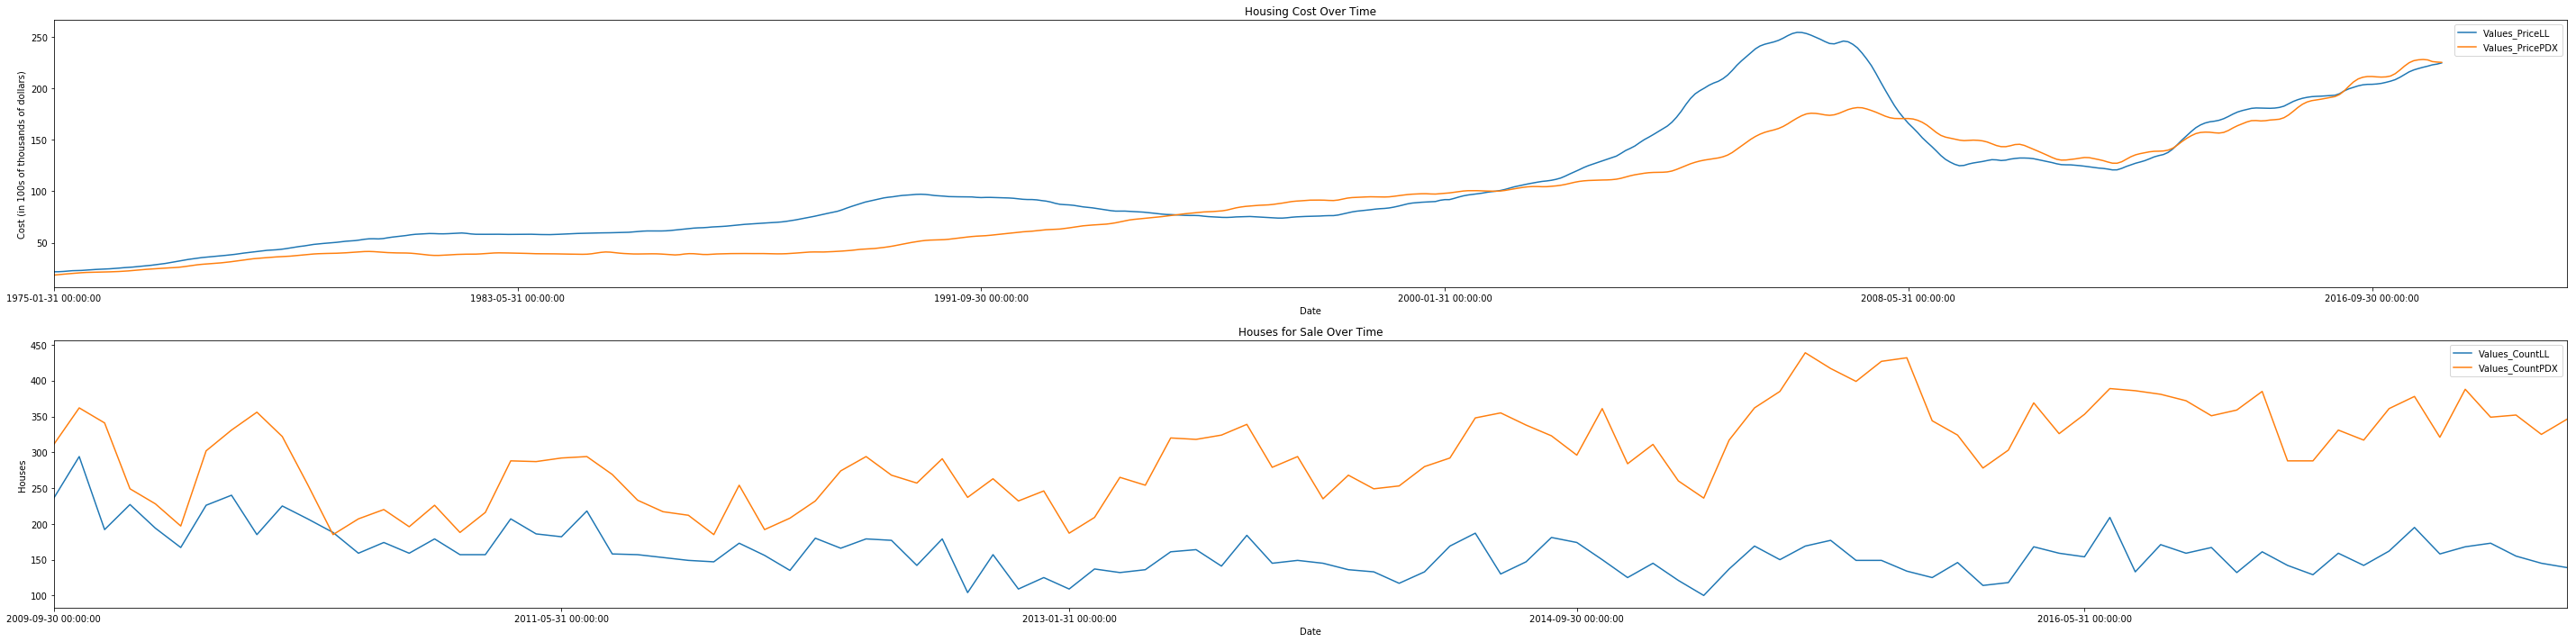

In [39]:
# Create Figure
ax = plt.figure()

#Create Subplot
ax0 = ax.add_subplot(211)
ax1 = ax.add_subplot(212)

df_all[['Values_PriceLL','Values_PricePDX']].plot(kind='line', figsize=(50, 12), ax=ax0) # add to subplot 1
ax0.set_title ('Housing Cost Over Time')
ax0.set_ylabel('Cost (in 100s of thousands of dollars)')
ax0.set_xlabel('Date')

df_Dropped[['Values_CountLL','Values_CountPDX']].plot(kind='line', figsize=(50, 12), ax=ax1) # add to subplot 1
ax1.set_title ('Houses for Sale Over Time')
ax1.set_ylabel('Houses')
ax1.set_xlabel('Date')


# Housing Plot interpretation:

### Housing Cost
It looks like Loma Linda had a huge cost spike right before the 2008 recession and is only now recovering. Portland on the other hand, really didn't have as much of a bubble burst and average housing values are now almost a full $100k higher.

### Housing Inventory
Loma Linda and Portland actually started fairly close in 2009 and held a fairly consistent gap until 2013 where Portland began listing more houses more frequently. Portland took another huge jump around 2015 where people really began building houses faster.

### Overall Conclusion
The prices track fairly close between Loma Linda and Portland. As Loma Linda is a smaller city it is likely more sensitive to large economic impacts, as seen by the recession. Once housing data is published for the Coronavirus epidemic I would expect to see Loma Linda housing prices fall, and houses available climb, both more substantially than Portland.

# Plot Job Data

,PDX,LL
Date,,
5/12/2020,29,18
5/13/2020,31,16


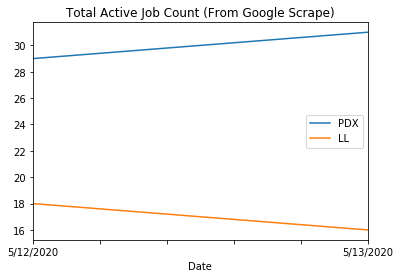

In [66]:


#df_job.plot(x = df_job['Date'], y = 'City')

df_job.plot(kind='line') # add to subplot 1


plt.title('Total Active Job Count (From Google Scrape)')


df_job

# Job Plot Interpretation:
These data are very limited, so no subsantial conclusions can be gained from them. Empirically, it looks as though Portland has about 2x as many Data Analyst jobs as Loma Linda, which is less than I expected, as the population is close to 8x the size. Maybe Loma Linda has a better job market? This will likely need to be further analysed in the future.

# Battle of Neighborhood

2. In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?


I would reccomend this person set up their business in Portland as the additional for-sale houses will bring in a larger p